# Unsupervised learning using scikit-learn

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [7]:
dataset = pd.read_json('unsupervised.json')

In [8]:
dataset.head()

,x,y,z
0,-0.341205,-0.329153,-0.115530
1,-0.629867,-0.481546,0.016993
2,-0.841906,-0.979988,-0.191260
3,0.298766,0.214716,-1.130165
4,-0.761079,-1.195055,-1.083350


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   z       1000 non-null   float64
dtypes: float64(3)
memory usage: 31.2 KB


In [10]:
dataset.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,-0.005196,-0.014451,-0.031426
std,1.036113,1.052409,1.052807
min,-5.655540,-5.870240,-5.655540
25%,-0.702440,-0.675936,-0.723400
50%,0.013861,-0.034048,-0.038032
75%,0.662793,0.725451,0.684250
max,3.449685,3.109915,2.954353


### Scale data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset)
dataset = pd.DataFrame(scaler.transform(dataset))

In [65]:
dataset.rename(columns={0:'x', 1:'y', 2:'z'}, inplace=True)

<AxesSubplot:>

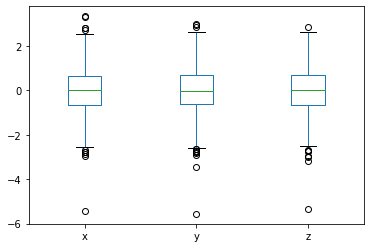

In [66]:
dataset.plot(kind='box', layout=(1,3), sharex=False, sharey=False)

### Create scatterplot of the data

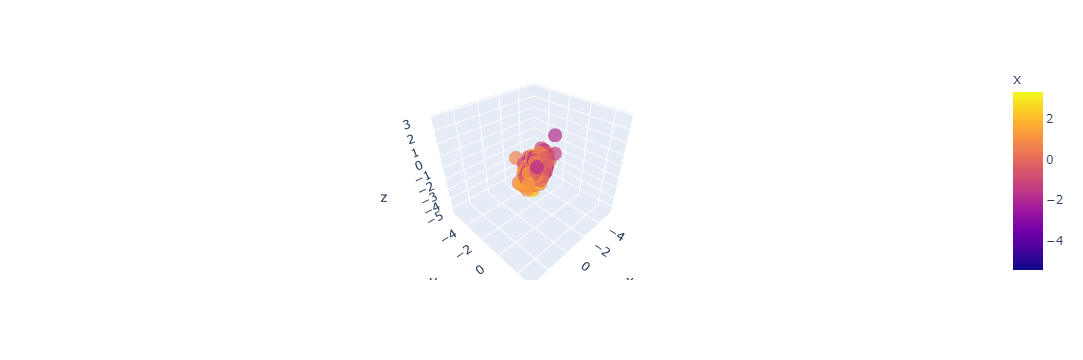

In [67]:
fig = px.scatter_3d(dataset, x='x', y='y', z='z',
              color='x', size_max=18,opacity=0.7)

fig.show()

### Use PCA to reduce dimensions to 2

In [68]:
from sklearn.decomposition import PCA

In [69]:
selection_method_pca = PCA(n_components=2)
selection_fit_pca = selection_method_pca.fit_transform(dataset)

In [70]:
pca_df = pd.DataFrame(data=selection_fit_pca, columns=['Principal Component 1', 'Principal Component 2'])

In [71]:
pca_df.head()

,Principal Component 1,Principal Component 2
0,0.407606,0.173404
1,0.580536,0.459956
2,1.090466,0.466521
3,0.298615,-0.950307
4,1.649974,-0.189701


In [72]:
dataset.head()

,x,y,z
0,-0.324459,-0.299180,-0.079926
1,-0.603200,-0.444056,0.046013
2,-0.807950,-0.917912,-0.151894
3,0.293515,0.217864,-1.044151
4,-0.729902,-1.122371,-0.999661


In [73]:
print(f'Explained variation per principal component: {selection_method_pca.explained_variance_ratio_}')

Explained variation per principal component: [0.91362492 0.06576021]


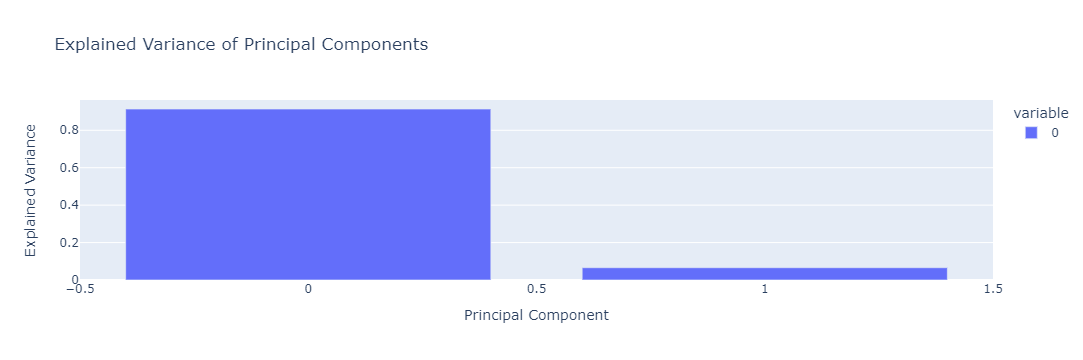

In [74]:
px.bar(selection_method_pca.explained_variance_ratio_, title="Explained Variance of Principal Components", labels={'index': 'Principal Component', 'value': 'Explained Variance'})

The numbers above tell us that Principal Component 1 holds approximately 91.36% of the information while Principal Component 2 holds only 6.57% of the information. Furthermore, the principal components were able to retain 97.93% (91.36% + 6.57%) of the information and 2.07% of the information was lost after projecting our 3-dimensional data to a 2-dimensional equivalent.

### 2D scatterplot of reduced data

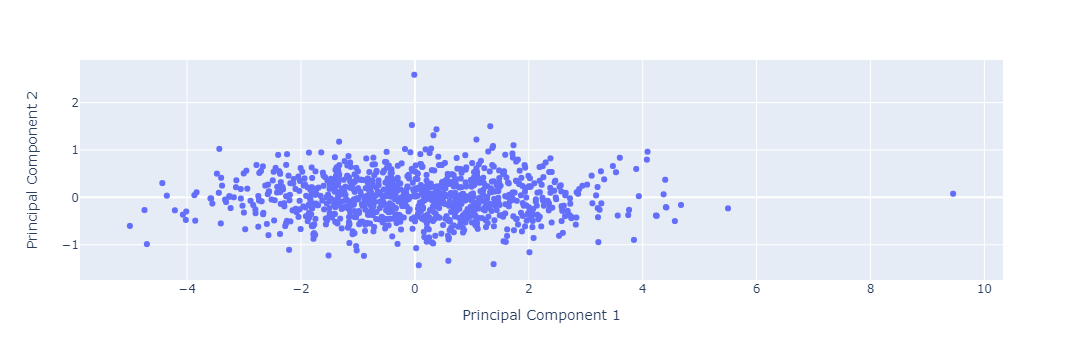

In [75]:
fig = px.scatter(pca_df, hover_name= pca_df.index , x='Principal Component 1', y='Principal Component 2')
fig.show()

### Create 3 principal components

In [76]:
selection_method_pca_2 = PCA(n_components=3)
selection_fit_pca_2 = selection_method_pca_2.fit_transform(dataset)

In [77]:
pca_df_2 = pd.DataFrame(data=selection_fit_pca_2, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

In [78]:
pca_df_2.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,0.407606,0.173404,0.070418
1,0.580536,0.459956,0.120712
2,1.090466,0.466521,0.334156
3,0.298615,-0.950307,-0.481260
4,1.649974,-0.189701,0.182741


In [79]:
dataset.head()

,x,y,z
0,-0.324459,-0.299180,-0.079926
1,-0.603200,-0.444056,0.046013
2,-0.807950,-0.917912,-0.151894
3,0.293515,0.217864,-1.044151
4,-0.729902,-1.122371,-0.999661


In [80]:
print(f'Explained variation per principal component: {selection_method_pca_2.explained_variance_ratio_}')

Explained variation per principal component: [0.91362492 0.06576021 0.02061487]


In [81]:
selection_method_pca_2.explained_variance_ratio_.sum()

1.0

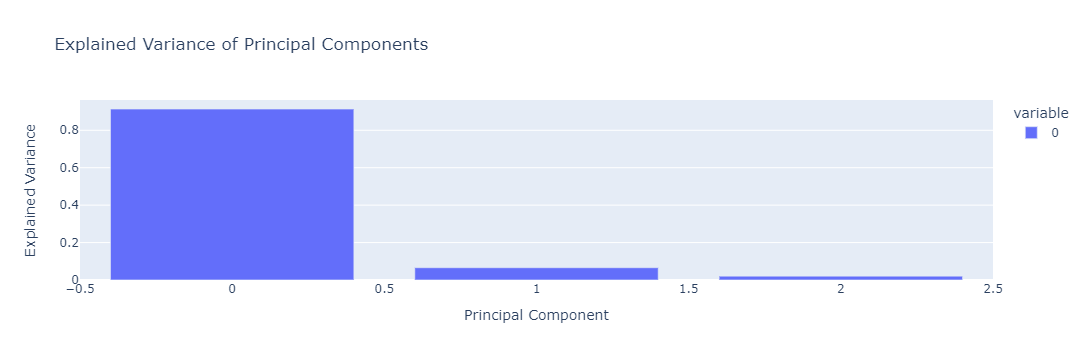

In [82]:
px.bar(selection_method_pca_2.explained_variance_ratio_, title="Explained Variance of Principal Components", labels={'index': 'Principal Component', 'value': 'Explained Variance'})

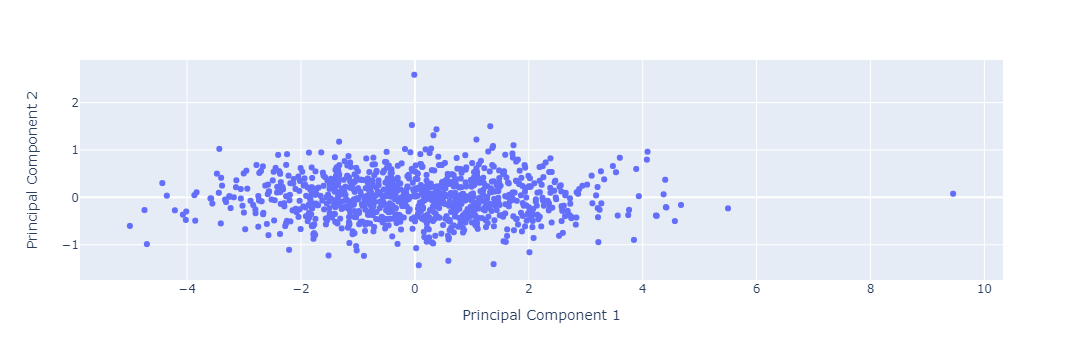

In [83]:
fig = px.scatter(pca_df_2, hover_name= pca_df_2.index , x='Principal Component 1', y='Principal Component 2')
fig.show()

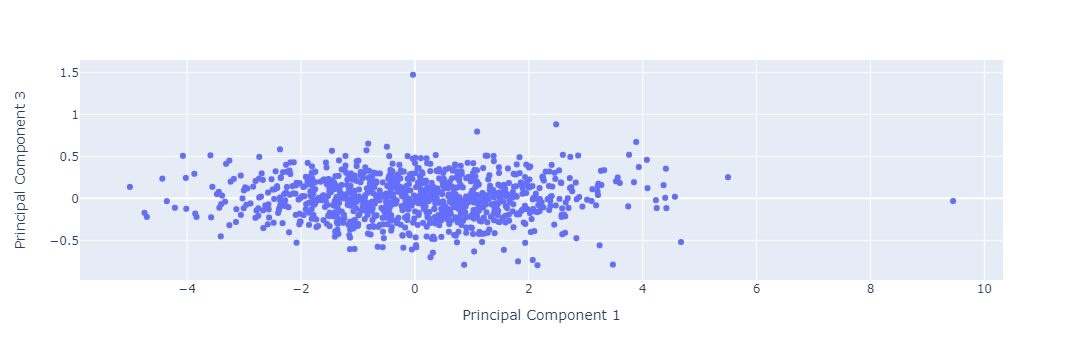

In [84]:
fig = px.scatter(pca_df_2, hover_name= pca_df_2.index , x='Principal Component 1', y='Principal Component 3')
fig.show()

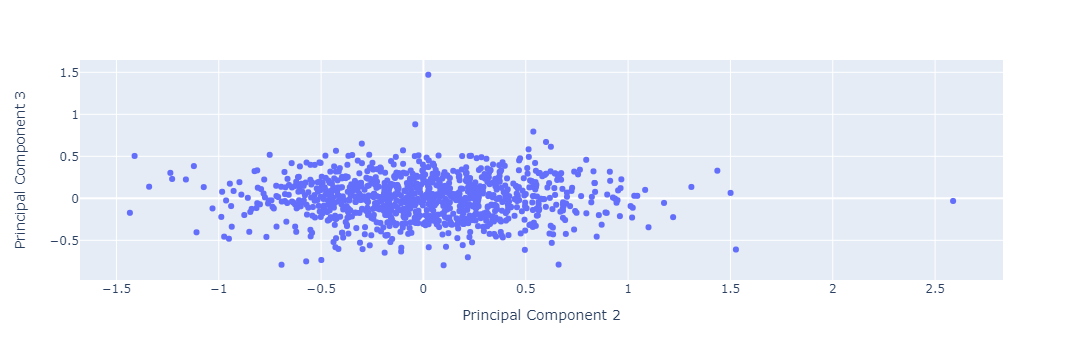

In [85]:
fig = px.scatter(pca_df_2, hover_name= pca_df_2.index , x='Principal Component 2', y='Principal Component 3')
fig.show()